Дискретное преобразование Фурье (ДПФ) — это математический инструмент, который преобразует изображение из пространственной области (где мы видим пиксели) в частотную область. Это позволяет анализировать частотные компоненты изображения, такие как повторяющиеся узоры или текстуры.

Зачем это нужно?

Преобразование Фурье помогает выявить частотные характеристики изображения, что полезно в задачах фильтрации, сжатия и анализа текстур.


In [39]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [40]:
filename = '../../image4labs/sudoku.jpg'
I = cv.imread(filename, cv.IMREAD_GRAYSCALE)

In [41]:
rows, cols = I.shape
m = cv.getOptimalDFTSize(rows)
n = cv.getOptimalDFTSize(cols)
padded = cv.copyMakeBorder(I, 0, m - rows, 0, n -
                           cols, cv.BORDER_CONSTANT, value=[0, 0, 0])

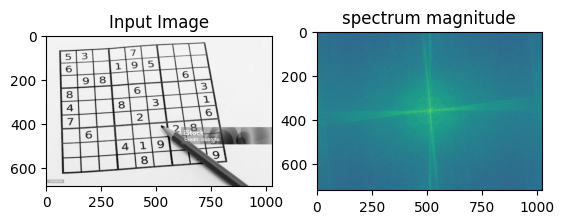

In [42]:

rows, cols = I.shape
m = cv.getOptimalDFTSize(rows)
n = cv.getOptimalDFTSize(cols)
padded = cv.copyMakeBorder(
    I, 0, m - rows, 0, n - cols, cv.BORDER_CONSTANT, value=[0, 0, 0])
planes = [np.float32(padded), np.zeros(padded.shape, np.float32)]
complexI = cv.merge(planes)  # Add to the expanded another plane with zeros

# this way the result may fit in the source matrix
cv.dft(complexI, complexI)

cv.split(complexI, planes)  # planes[0] = Re(DFT(I), planes[1] = Im(DFT(I))
cv.magnitude(planes[0], planes[1], planes[0])  # planes[0] = magnitude
magI = planes[0]

matOfOnes = np.ones(magI.shape, dtype=magI.dtype)
cv.add(matOfOnes, magI, magI)  # switch to logarithmic scale
cv.log(magI, magI)
magI_rows, magI_cols = magI.shape
# crop the spectrum, if it has an odd number of rows or columns
magI = magI[0:(magI_rows & -2), 0:(magI_cols & -2)]
cx = int(magI_rows/2)
cy = int(magI_cols/2)
q0 = magI[0:cx, 0:cy]  # Top-Left - Create a ROI per quadrant
q1 = magI[cx:cx+cx, 0:cy]  # Top-Right
q2 = magI[0:cx, cy:cy+cy]  # Bottom-Left
q3 = magI[cx:cx+cx, cy:cy+cy]  # Bottom-Right

tmp = np.copy(q0)  # swap quadrants (Top-Left with Bottom-Right)
magI[0:cx, 0:cy] = q3
magI[cx:cx + cx, cy:cy + cy] = tmp
tmp = np.copy(q1)  # swap quadrant (Top-Right with Bottom-Left)
magI[cx:cx + cx, 0:cy] = q2
magI[0:cx, cy:cy + cy] = tmp

# Transform the matrix with float values into a
cv.normalize(magI, magI, 0, 1, cv.NORM_MINMAX)

plt.subplot(121)
plt.imshow(I, 'grey')
plt.title("Input Image")
plt.subplot(122)
plt.imshow(magI)
plt.title("spectrum magnitude")
plt.show()